# CelebA Training with Distance Weight

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, VGG16Model, ResNet50Model, EfficientB7Model

In [2]:
# to reproduce

seed = 42
random.seed(seed) #　ほかのモジュールで使われているかも
np.random.seed(seed) # ほかのモジュールで使われているかも
torch.manual_seed(seed) # Pytorchの中のシード
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない
from distancetraining import ModelTrainer

# Efficientnet

In [3]:
db = "CelebA"
model_name = "efficientnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

In [4]:
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [5]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5093
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5256
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5451
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5561
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5784
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.5913
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6066
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6206
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6401
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6513
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6718
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.6865
Validation Accuracy: 0.4916 | Loss: 0.0005 | F1: 0.0000 | AUC: 0.7030
Validation Accuracy: 0.4930 | Loss: 0.0005 | F1: 0.0055 | AUC: 0.7186
Validation Accuracy:

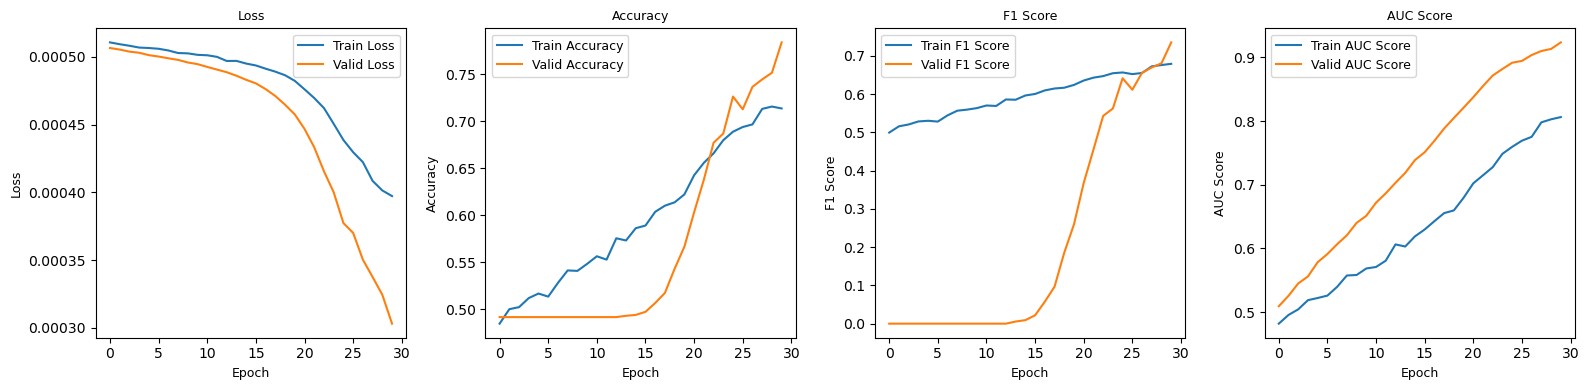

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 30
lr = 1e-6
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [7]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1049
           1       0.93      0.74      0.82      1085

    accuracy                           0.84      2134
   macro avg       0.85      0.84      0.84      2134
weighted avg       0.85      0.84      0.84      2134

Skin tone 1: Accuracy 0.8369259606373008
Skin tone 2: Accuracy 0.837863167760075


In [8]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1047
           1       0.92      0.73      0.82      1082

    accuracy                           0.83      2129
   macro avg       0.85      0.83      0.83      2129
weighted avg       0.85      0.83      0.83      2129

Skin tone 2: Accuracy 0.8283858998144712
Skin tone 1: Accuracy 0.8382492863939106


# Resnet

In [9]:
model_name = "resnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.4982
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5293
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5183
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5393
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5426
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5582
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5693
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5807
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5727
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6040
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6000
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6258
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6471
Validation Accuracy: 0.4916 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6497
Validation Accuracy:

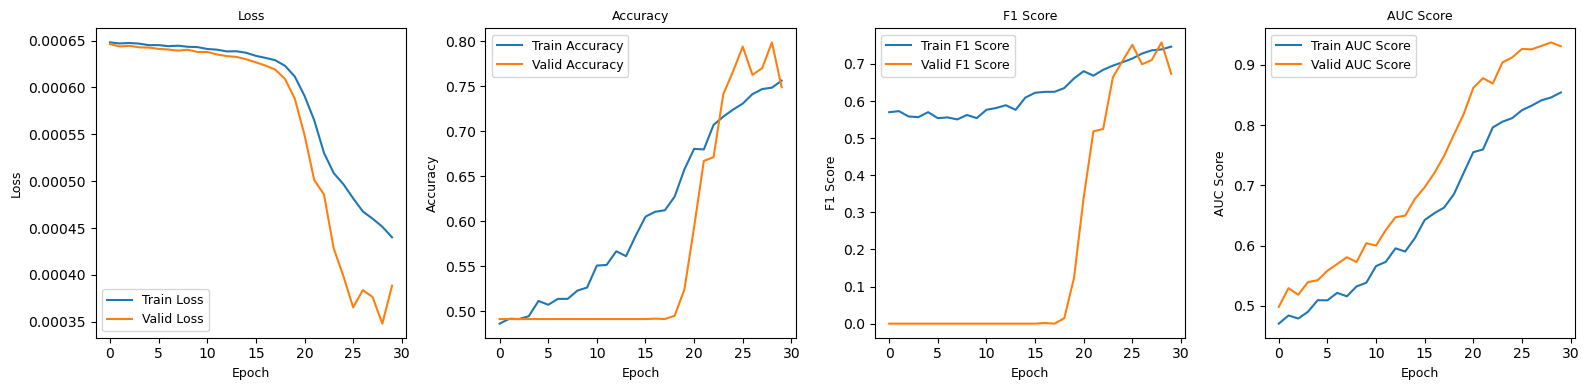

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 30
lr = 1e-6
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [11]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1049
           1       0.95      0.75      0.84      1085

    accuracy                           0.85      2134
   macro avg       0.87      0.85      0.85      2134
weighted avg       0.87      0.85      0.85      2134

Skin tone 1: Accuracy 0.8641049671977507
Skin tone 2: Accuracy 0.837863167760075


In [12]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1047
           1       0.94      0.75      0.84      1082

    accuracy                           0.85      2129
   macro avg       0.87      0.85      0.85      2129
weighted avg       0.87      0.85      0.85      2129

Skin tone 2: Accuracy 0.8432282003710575
Skin tone 1: Accuracy 0.8591817316841104


# VGG

In [13]:
model_name = "vgg"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.5023 | Loss: 0.0011 | F1: 0.0467 | AUC: 0.7071
Validation Accuracy: 0.6546 | Loss: 0.0010 | F1: 0.5030 | AUC: 0.8331
Validation Accuracy: 0.8004 | Loss: 0.0008 | F1: 0.7992 | AUC: 0.8895
Validation Accuracy: 0.8327 | Loss: 0.0007 | F1: 0.8374 | AUC: 0.9163
Validation Accuracy: 0.8486 | Loss: 0.0006 | F1: 0.8417 | AUC: 0.9276
Validation Accuracy: 0.8529 | Loss: 0.0006 | F1: 0.8524 | AUC: 0.9360
Validation Accuracy: 0.8688 | Loss: 0.0005 | F1: 0.8649 | AUC: 0.9447
Validation Accuracy: 0.8721 | Loss: 0.0005 | F1: 0.8642 | AUC: 0.9500
Validation Accuracy: 0.8777 | Loss: 0.0005 | F1: 0.8694 | AUC: 0.9558
Validation Accuracy: 0.8608 | Loss: 0.0005 | F1: 0.8470 | AUC: 0.9571
Validation Accuracy: 0.8894 | Loss: 0.0004 | F1: 0.8857 | AUC: 0.9603
Validation Accuracy: 0.8861 | Loss: 0.0004 | F1: 0.8801 | AUC: 0.9629
Validation Accuracy: 0.8960 | Loss: 0.0004 | F1: 0.8949 | AUC: 0.9638
Validation Accuracy: 0.8875 | Loss: 0.0004 | F1: 0.8800 | AUC: 0.9652
Validation Accuracy:

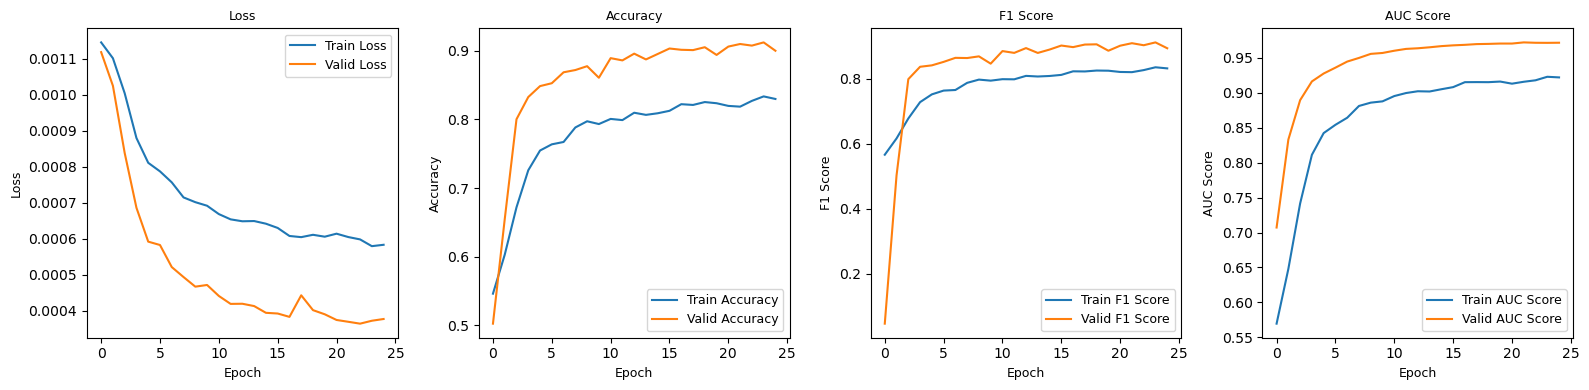

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 1e-6
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [15]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1049
           1       0.94      0.88      0.91      1085

    accuracy                           0.91      2134
   macro avg       0.91      0.91      0.91      2134
weighted avg       0.91      0.91      0.91      2134

Skin tone 1: Accuracy 0.9259606373008434
Skin tone 2: Accuracy 0.8959700093720713


In [16]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1047
           1       0.93      0.89      0.91      1082

    accuracy                           0.91      2129
   macro avg       0.91      0.91      0.91      2129
weighted avg       0.91      0.91      0.91      2129

Skin tone 2: Accuracy 0.8998144712430427
Skin tone 1: Accuracy 0.9153187440532826
